In [7]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression

In [8]:
pip install windrose

Note: you may need to restart the kernel to use updated packages.


In [9]:
from windrose import WindroseAxes

# A PART

### Data Load, Concatenation, deal with missing values, create new columns

In [3]:
# Let's load the datasets and have a glance on the data

In [10]:
df1213 = pd.read_csv(r'athens 2012-01-01 to 2013-12-31.csv')

In [11]:
df1213.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,athens,2012-01-01,11.4,7.0,8.5,11.4,3.9,5.9,0.5,57.3,...,9.3,4,NaN,2012-01-01T07:41:04,2012-01-01T17:15:44,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."
1,athens,2012-01-02,12.1,2.1,7.4,12.1,0.9,6.1,-0.4,58.4,...,10.5,5,NaN,2012-01-02T07:41:13,2012-01-02T17:16:32,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."
2,athens,2012-01-03,13.3,0.6,6.1,13.3,-1.8,5.4,1.0,70.9,...,10.8,5,NaN,2012-01-03T07:41:20,2012-01-03T17:17:21,0.31,Clear,Clear conditions throughout the day.,clear-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."
3,athens,2012-01-04,14.0,2.5,7.5,14.0,0.3,6.9,3.7,77.4,...,5.8,3,NaN,2012-01-04T07:41:26,2012-01-04T17:18:12,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."
4,athens,2012-01-05,14.6,2.1,8.0,14.6,0.3,7.5,4.7,81.2,...,10.6,5,NaN,2012-01-05T07:41:29,2012-01-05T17:19:04,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."


In [12]:
df1213.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              731 non-null    object 
 1   datetime          731 non-null    object 
 2   tempmax           731 non-null    float64
 3   tempmin           731 non-null    float64
 4   temp              731 non-null    float64
 5   feelslikemax      731 non-null    float64
 6   feelslikemin      731 non-null    float64
 7   feelslike         731 non-null    float64
 8   dew               731 non-null    float64
 9   humidity          731 non-null    float64
 10  precip            731 non-null    float64
 11  precipprob        731 non-null    int64  
 12  precipcover       731 non-null    float64
 13  preciptype        108 non-null    object 
 14  snow              731 non-null    int64  
 15  snowdepth         731 non-null    int64  
 16  windgust          290 non-null    float64
 1

In [13]:
df1415 = pd.read_csv(r'athens 2014-01-01 to 2015-12-31.csv')

In [14]:
df1415.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,athens,2014-01-01,9.8,8.0,8.9,8.9,6.2,7.4,5.1,77.2,...,2.5,1,NaN,2014-01-01T07:41:08,2014-01-01T17:16:08,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"LGEL,16716199999,LGAV,16718099999,16699099999,..."
1,athens,2014-01-02,12.5,6.6,10.3,12.5,6.6,9.4,6.0,74.9,...,9.6,5,NaN,2014-01-02T07:41:16,2014-01-02T17:16:57,0.03,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16699099999,..."
2,athens,2014-01-03,14.7,5.0,9.0,14.7,3.9,8.7,5.2,78.3,...,9.9,5,NaN,2014-01-03T07:41:22,2014-01-03T17:17:47,0.07,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16699099999,..."
3,athens,2014-01-04,13.9,4.7,8.7,13.9,3.3,8.3,4.8,78.1,...,10.3,5,NaN,2014-01-04T07:41:27,2014-01-04T17:18:38,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16699099999,..."
4,athens,2014-01-05,14.9,3.0,8.6,14.9,1.7,8.2,5.6,82.5,...,10.6,5,NaN,2014-01-05T07:41:29,2014-01-05T17:19:30,0.13,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16699099999,..."


In [15]:
df1415.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              730 non-null    object 
 1   datetime          730 non-null    object 
 2   tempmax           730 non-null    float64
 3   tempmin           730 non-null    float64
 4   temp              730 non-null    float64
 5   feelslikemax      730 non-null    float64
 6   feelslikemin      730 non-null    float64
 7   feelslike         730 non-null    float64
 8   dew               730 non-null    float64
 9   humidity          730 non-null    float64
 10  precip            730 non-null    float64
 11  precipprob        730 non-null    int64  
 12  precipcover       730 non-null    float64
 13  preciptype        191 non-null    object 
 14  snow              730 non-null    int64  
 15  snowdepth         730 non-null    float64
 16  windgust          607 non-null    float64
 1

In [16]:
df1617 = pd.read_csv(r'athens 2016-01-01 to 2017-12-31.csv')

In [17]:
df1617.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,athens,2016-01-01,6.4,-1.0,2.2,4.5,-4.8,-0.4,-4.5,63.1,...,10.9,5,NaN,2016-01-01T07:41:03,2016-01-01T17:15:45,0.72,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"16716199999,LGAV,16741099999,16718099999,16716..."
1,athens,2016-01-02,10.3,-0.7,5.3,10.3,-2.3,5.0,0.7,72.8,...,4.0,2,NaN,2016-01-02T07:41:12,2016-01-02T17:16:33,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"16716199999,LGAV,16741099999,16718099999,16716..."
2,athens,2016-01-03,14.0,2.0,9.3,14.0,2.0,9.3,6.8,84.2,...,4.3,3,NaN,2016-01-03T07:41:19,2016-01-03T17:17:22,0.79,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"16716199999,LGAV,16741099999,16718099999,16716..."
3,athens,2016-01-04,17.0,8.4,12.5,17.0,6.4,12.3,7.5,72.5,...,9.2,5,NaN,2016-01-04T07:41:24,2016-01-04T17:18:12,0.82,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,LGAV,16741099999,16718099999,16716..."
4,athens,2016-01-05,20.3,12.9,16.1,20.3,12.9,16.1,11.8,75.9,...,6.7,4,NaN,2016-01-05T07:41:27,2016-01-05T17:19:04,0.85,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,LGAV,16741099999,16718099999,16716..."


In [18]:
df1617.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              731 non-null    object 
 1   datetime          731 non-null    object 
 2   tempmax           731 non-null    float64
 3   tempmin           731 non-null    float64
 4   temp              731 non-null    float64
 5   feelslikemax      731 non-null    float64
 6   feelslikemin      731 non-null    float64
 7   feelslike         731 non-null    float64
 8   dew               731 non-null    float64
 9   humidity          731 non-null    float64
 10  precip            731 non-null    float64
 11  precipprob        731 non-null    int64  
 12  precipcover       731 non-null    float64
 13  preciptype        189 non-null    object 
 14  snow              731 non-null    int64  
 15  snowdepth         731 non-null    int64  
 16  windgust          731 non-null    float64
 1

In [19]:
df1819 = pd.read_csv(r'athens 2018-01-01 to 2019-12-31.csv')

In [20]:
df1819.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,athens,2018-01-01,17.0,2.5,9.4,17.0,1.2,9.1,2.9,66.2,...,6.5,3,NaN,2018-01-01T07:41:07,2018-01-01T17:16:09,0.48,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16741099999,16718099999,..."
1,athens,2018-01-02,17.5,8.7,12.5,17.5,7.8,12.4,6.5,68.2,...,5.5,3,NaN,2018-01-02T07:41:16,2018-01-02T17:16:57,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16741099999,16718099999,..."
2,athens,2018-01-03,14.0,5.9,10.2,14.0,5.9,10.0,4.9,71.0,...,5.3,3,NaN,2018-01-03T07:41:22,2018-01-03T17:17:47,0.54,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"LGEL,16716199999,LGAV,16741099999,16718099999,..."
3,athens,2018-01-04,11.5,6.7,9.1,11.5,4.5,7.7,4.5,73.7,...,1.7,1,NaN,2018-01-04T07:41:26,2018-01-04T17:18:38,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."
4,athens,2018-01-05,14.5,5.0,9.6,14.5,3.1,8.9,1.4,57.9,...,6.5,3,NaN,2018-01-05T07:41:28,2018-01-05T17:19:31,0.61,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"LGEL,16716199999,LGAV,16741099999,16718099999,..."


In [21]:
df1819.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              730 non-null    object 
 1   datetime          730 non-null    object 
 2   tempmax           730 non-null    float64
 3   tempmin           730 non-null    float64
 4   temp              730 non-null    float64
 5   feelslikemax      730 non-null    float64
 6   feelslikemin      730 non-null    float64
 7   feelslike         730 non-null    float64
 8   dew               730 non-null    float64
 9   humidity          730 non-null    float64
 10  precip            730 non-null    float64
 11  precipprob        730 non-null    int64  
 12  precipcover       730 non-null    float64
 13  preciptype        227 non-null    object 
 14  snow              730 non-null    int64  
 15  snowdepth         730 non-null    int64  
 16  windgust          730 non-null    float64
 1

In [22]:
df2021 = pd.read_csv(r'athens 2020-01-01 to 2021-12-31.csv')

In [23]:
df2021.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,athens,2020-01-01,11.4,1.2,7.3,11.4,1.2,6.4,0.3,61.5,...,4.1,3,NaN,2020-01-01T07:41:04,2020-01-01T17:15:46,0.20,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."
1,athens,2020-01-02,8.8,4.8,6.8,5.4,0.2,2.7,-0.4,60.5,...,6.3,6,NaN,2020-01-02T07:41:13,2020-01-02T17:16:34,0.23,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."
2,athens,2020-01-03,10.7,6.9,8.2,10.7,2.6,5.6,-1.4,51.1,...,8.1,5,NaN,2020-01-03T07:41:20,2020-01-03T17:17:23,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."
3,athens,2020-01-04,15.3,5.9,9.5,15.3,4.8,9.2,-1.9,46.2,...,8.0,5,NaN,2020-01-04T07:41:25,2020-01-04T17:18:14,0.30,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."
4,athens,2020-01-05,11.9,5.0,7.6,11.9,2.2,6.4,3.2,74.0,...,0.5,1,NaN,2020-01-05T07:41:28,2020-01-05T17:19:06,0.33,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."


In [24]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              731 non-null    object 
 1   datetime          731 non-null    object 
 2   tempmax           731 non-null    float64
 3   tempmin           731 non-null    float64
 4   temp              731 non-null    float64
 5   feelslikemax      731 non-null    float64
 6   feelslikemin      731 non-null    float64
 7   feelslike         731 non-null    float64
 8   dew               731 non-null    float64
 9   humidity          731 non-null    float64
 10  precip            731 non-null    float64
 11  precipprob        731 non-null    int64  
 12  precipcover       731 non-null    float64
 13  preciptype        191 non-null    object 
 14  snow              731 non-null    int64  
 15  snowdepth         731 non-null    int64  
 16  windgust          729 non-null    float64
 1

In [25]:
df22 = pd.read_csv(r'athens 2022-01-01 to 2022-12-31.csv')

In [26]:
df22.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,athens,2022-01-01,17.7,5.6,11.7,17.7,5.6,11.6,5.9,68.1,...,7.0,5,NaN,2022-01-01T07:41:10,2022-01-01T17:16:11,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,E4115,LGAV,16741099999,16718099999..."
1,athens,2022-01-02,17.7,8.3,12.8,17.7,8.3,12.7,6.7,67.7,...,7.7,5,NaN,2022-01-02T07:41:18,2022-01-02T17:17:00,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,E4115,LGAV,16741099999,16718099999..."
2,athens,2022-01-03,17.7,5.7,11.7,17.7,4.8,11.5,7.2,75.2,...,7.7,5,NaN,2022-01-03T07:41:24,2022-01-03T17:17:50,0.02,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,E4115,LGAV,16741099999,16718099999..."
3,athens,2022-01-04,17.6,6.3,12.0,17.6,6.3,12.0,7.3,74.2,...,8.7,5,NaN,2022-01-04T07:41:28,2022-01-04T17:18:41,0.05,Clear,Clear conditions throughout the day.,clear-day,"16716199999,E4115,LGAV,16741099999,16718099999..."
4,athens,2022-01-05,17.7,9.0,12.9,17.7,9.0,12.9,8.3,74.2,...,7.8,5,NaN,2022-01-05T07:41:30,2022-01-05T17:19:34,0.09,Clear,Clear conditions throughout the day.,clear-day,"16716199999,E4115,LGAV,16741099999,16718099999..."


In [27]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              365 non-null    object 
 1   datetime          365 non-null    object 
 2   tempmax           365 non-null    float64
 3   tempmin           365 non-null    float64
 4   temp              365 non-null    float64
 5   feelslikemax      365 non-null    float64
 6   feelslikemin      365 non-null    float64
 7   feelslike         365 non-null    float64
 8   dew               365 non-null    float64
 9   humidity          365 non-null    float64
 10  precip            365 non-null    float64
 11  precipprob        365 non-null    int64  
 12  precipcover       365 non-null    float64
 13  preciptype        114 non-null    object 
 14  snow              365 non-null    float64
 15  snowdepth         365 non-null    float64
 16  windgust          365 non-null    float64
 1

In [28]:
df23 = pd.read_csv(r'athens2023-01-01 to 2023-11-21.csv')

In [29]:
df23.head()

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,athens,2023-01-01,16.9,6.8,11.7,16.9,6.6,11.5,6.4,...,7.4,5,10,2023-01-01T07:41:08,2023-01-01T17:16:00,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."
1,1,athens,2023-01-02,16.5,4.3,10.2,16.5,4.3,9.9,4.7,...,7.7,5,10,2023-01-02T07:41:17,2023-01-02T17:16:48,0.34,Clear,Clear conditions throughout the day.,clear-day,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."
2,2,athens,2023-01-03,16.5,4.4,9.6,16.5,4.4,9.5,5.6,...,7.6,5,10,2023-01-03T07:41:24,2023-01-03T17:17:38,0.38,Clear,Clear conditions throughout the day.,clear-day,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."
3,3,athens,2023-01-04,17.2,4.9,10.5,17.2,4.1,10.3,6.4,...,7.5,5,10,2023-01-04T07:41:28,2023-01-04T17:18:29,0.41,Clear,Clear conditions throughout the day.,clear-day,"LGEL,16716199999,E4115,LGAV,16741099999,167180..."
4,4,athens,2023-01-05,18.3,7.5,11.8,18.3,6.9,11.7,7.8,...,7.5,5,10,2023-01-05T07:41:31,2023-01-05T17:19:21,0.45,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"LGEL,16716199999,E4115,LGAV,H8EW,16741099999,1..."


In [30]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        325 non-null    int64  
 1   name              325 non-null    object 
 2   datetime          325 non-null    object 
 3   tempmax           321 non-null    float64
 4   tempmin           322 non-null    float64
 5   temp              325 non-null    float64
 6   feelslikemax      325 non-null    float64
 7   feelslikemin      325 non-null    float64
 8   feelslike         325 non-null    float64
 9   dew               325 non-null    float64
 10  humidity          325 non-null    float64
 11  precip            325 non-null    float64
 12  precipprob        325 non-null    int64  
 13  precipcover       325 non-null    float64
 14  preciptype        118 non-null    object 
 15  snow              325 non-null    float64
 16  snowdepth         325 non-null    float64
 1

In [31]:
# We observe that for all datasets we have the same amount of columns and some NaN values that it is not important to deal with

In [32]:
# However, for 2023 we should drop a column ('Unnamed:0') and deal with some NaN values in 'tempmax' and 'tempmin'

In [33]:
df23.isnull().sum()

Unnamed: 0            0
name                  0
datetime              0
tempmax               4
tempmin               3
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          207
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [34]:
df23.drop('Unnamed: 0',axis = 1,inplace = True)

In [35]:
# In order to deal with the missing values we will use cubic interpolation from SciPy library

In [36]:
def cubinter (i, column):
    xtm = [i-3 , i-2 , i-1 , i+1 , i+2 , i+3]
    ytm = [column[i-3],column[i-2] , column[i-1], column[i+1], column[i+2], column[i+3]]
    ftm = interp1d(xtm,ytm,kind = 'cubic')
    return ftm(i)

In [37]:
for i in range(len(df23['tempmax'])):
    if np.isnan(df23['tempmax'][i]):
        print(cubinter(i,df23['tempmax']))
        df23['tempmax'][i] = cubinter(i,df23['tempmax'])
    else:
        pass

40.39375000000001
29.850000000000005
24.321875000000002
20.503125000000004


C:\Users\USER\AppData\Local\Temp\ipykernel_7960\2673894012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23['tempmax'][i] = cubinter(i,df23['tempmax'])


In [38]:
for i in range(len(df23['tempmin'])):
    if np.isnan(df23['tempmin'][i]):
        print(cubinter(i,df23['tempmin']))
        df23['tempmin'][i] = cubinter(i,df23['tempmin'])
    else:
        pass

13.078125000000004
26.265625000000007
17.94375


C:\Users\USER\AppData\Local\Temp\ipykernel_7960\364933021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23['tempmin'][i] = cubinter(i,df23['tempmin'])


In [39]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              325 non-null    object 
 1   datetime          325 non-null    object 
 2   tempmax           325 non-null    float64
 3   tempmin           325 non-null    float64
 4   temp              325 non-null    float64
 5   feelslikemax      325 non-null    float64
 6   feelslikemin      325 non-null    float64
 7   feelslike         325 non-null    float64
 8   dew               325 non-null    float64
 9   humidity          325 non-null    float64
 10  precip            325 non-null    float64
 11  precipprob        325 non-null    int64  
 12  precipcover       325 non-null    float64
 13  preciptype        118 non-null    object 
 14  snow              325 non-null    float64
 15  snowdepth         325 non-null    float64
 16  windgust          325 non-null    float64
 1

In [40]:
# Now we are ready for the concatenation

In [41]:
df = pd.concat([df1213,df1415,df1617,df1819,df2021,df22,df23]).reset_index()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             4343 non-null   int64  
 1   name              4343 non-null   object 
 2   datetime          4343 non-null   object 
 3   tempmax           4343 non-null   float64
 4   tempmin           4343 non-null   float64
 5   temp              4343 non-null   float64
 6   feelslikemax      4343 non-null   float64
 7   feelslikemin      4343 non-null   float64
 8   feelslike         4343 non-null   float64
 9   dew               4343 non-null   float64
 10  humidity          4343 non-null   float64
 11  precip            4343 non-null   float64
 12  precipprob        4343 non-null   int64  
 13  precipcover       4343 non-null   float64
 14  preciptype        1138 non-null   object 
 15  snow              4343 non-null   float64
 16  snowdepth         4343 non-null   float64


In [43]:
df.shape

(4343, 34)

In [44]:
df.describe()

,index,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,...,4343.000000,4343.000000,4341.000000,4343.000000,4331.000000,4343.000000,4343.000000,4343.000000,681.000000,4343.000000
mean,334.260880,22.947287,13.913789,18.374994,22.564172,13.479300,18.041193,9.297007,58.951623,1.143229,...,22.925098,158.342897,1014.826584,38.096523,10.021565,183.436127,15.834032,6.289662,10.389134,0.482181
std,209.689467,7.726328,6.904925,7.152411,7.670640,7.493302,7.448266,4.792944,14.174370,4.698846,...,8.035102,130.323855,5.970500,22.597399,0.432850,99.566916,8.606851,2.643905,3.178947,0.288623
min,0.000000,2.000000,-3.300000,-0.400000,-2.100000,-7.800000,-4.900000,-7.500000,23.500000,0.000000,...,3.500000,0.000000,992.000000,0.000000,4.700000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,155.000000,17.000000,8.500000,12.500000,17.000000,7.700000,12.500000,6.200000,48.100000,0.000000,...,17.000000,18.300000,1010.900000,21.500000,10.000000,103.800000,8.950000,5.000000,10.000000,0.250000
50%,310.000000,22.600000,13.500000,17.900000,22.600000,13.500000,17.900000,9.800000,59.500000,0.000000,...,22.000000,158.500000,1014.200000,35.500000,10.000000,177.500000,15.300000,6.000000,10.000000,0.480000
75%,513.000000,29.700000,19.700000,24.600000,28.900000,19.700000,24.500000,12.800000,70.100000,0.000000,...,28.200000,271.800000,1018.400000,53.300000,10.000000,267.900000,23.100000,9.000000,10.000000,0.750000
max,730.000000,42.700000,29.300000,34.300000,40.500000,28.800000,33.700000,20.200000,96.400000,60.164000,...,72.900000,360.000000,1037.500000,100.000000,16.700000,735.200000,64.000000,10.000000,60.000000,0.980000


In [45]:
df.head()

,index,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,athens,2012-01-01,11.4,7.0,8.5,11.4,3.9,5.9,0.5,...,9.3,4,NaN,2012-01-01T07:41:04,2012-01-01T17:15:44,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."
1,1,athens,2012-01-02,12.1,2.1,7.4,12.1,0.9,6.1,-0.4,...,10.5,5,NaN,2012-01-02T07:41:13,2012-01-02T17:16:32,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."
2,2,athens,2012-01-03,13.3,0.6,6.1,13.3,-1.8,5.4,1.0,...,10.8,5,NaN,2012-01-03T07:41:20,2012-01-03T17:17:21,0.31,Clear,Clear conditions throughout the day.,clear-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."
3,3,athens,2012-01-04,14.0,2.5,7.5,14.0,0.3,6.9,3.7,...,5.8,3,NaN,2012-01-04T07:41:26,2012-01-04T17:18:12,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."
4,4,athens,2012-01-05,14.6,2.1,8.0,14.6,0.3,7.5,4.7,...,10.6,5,NaN,2012-01-05T07:41:29,2012-01-05T17:19:04,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,..."


In [46]:
# Let's make some new useful columns

In [47]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')

In [48]:
df['Year'] = df['datetime'].dt.year

In [49]:
df['Month'] = df['datetime'].dt.month

In [50]:
# Further to our analysis we will need to have a column with the 32 points of the compass, So we will calculate them from the degrees

In [51]:
directions = ['NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW','N']
dicdir = {directions[i]:(i+1/2)*22.5 for i in range(len(directions))}

def directions (a):
    x = [0,a]
    for k in dicdir.keys():
        if x[1]>max(dicdir.values()) or x[1]<min(dicdir.values()):
            x[0] = 'N'
        else:
            if x[1]>dicdir[k]:
                x[0] = k
            else:
                pass
    return x[0]

In [52]:
df['direction'] = list(map(directions,df['winddir']))

In [53]:
df.head()

,index,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,sunrise,sunset,moonphase,conditions,description,icon,stations,Year,Month,direction
0,0,athens,2012-01-01,11.4,7.0,8.5,11.4,3.9,5.9,0.5,...,2012-01-01T07:41:04,2012-01-01T17:15:44,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,...",2012,1,NNW
1,1,athens,2012-01-02,12.1,2.1,7.4,12.1,0.9,6.1,-0.4,...,2012-01-02T07:41:13,2012-01-02T17:16:32,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,...",2012,1,NNW
2,2,athens,2012-01-03,13.3,0.6,6.1,13.3,-1.8,5.4,1.0,...,2012-01-03T07:41:20,2012-01-03T17:17:21,0.31,Clear,Clear conditions throughout the day.,clear-day,"LGEL,16716199999,LGAV,16718099999,16716099999,...",2012,1,NNW
3,3,athens,2012-01-04,14.0,2.5,7.5,14.0,0.3,6.9,3.7,...,2012-01-04T07:41:26,2012-01-04T17:18:12,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,...",2012,1,NW
4,4,athens,2012-01-05,14.6,2.1,8.0,14.6,0.3,7.5,4.7,...,2012-01-05T07:41:29,2012-01-05T17:19:04,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LGEL,16716199999,LGAV,16718099999,16716099999,...",2012,1,WNW


# B PART

### Calculations of temperature, wind, rain, snow throughout the decade

In [54]:
# Let's calculate from which direction was windy each day. What's the average?

In [55]:
lst = [i for i in range(2012,2023)]
dfdir = pd.DataFrame()
for i in range(len(lst)):
    x = df[df['Year']==lst[i]].groupby('direction').count()['datetime']
    dfdir[f'{lst[i]}'] = x

In [56]:
dfdir 

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
direction,,,,,,,,,,,
E,7,12,7,9,7,9,8,7,12,10,15
ENE,10,9,9,4,17,22,7,11,8,14,14
ESE,8,7,15,7,13,22,13,15,10,14,7
N,120,105,100,138,76,87,123,119,136,103,98
NE,14,15,10,10,22,20,19,17,18,17,21
NNE,31,45,49,35,77,65,41,35,27,30,84
NNW,49,33,25,42,20,16,32,20,32,23,15
NW,14,7,11,12,5,10,9,10,10,10,6
S,14,21,18,25,14,16,20,28,20,24,21


In [57]:
dfdir['AVG'] = round(dfdir.mean(axis=1),2)

In [58]:
dfdir

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,AVG
direction,,,,,,,,,,,,
E,7,12,7,9,7,9,8,7,12,10,15,9.36
ENE,10,9,9,4,17,22,7,11,8,14,14,11.36
ESE,8,7,15,7,13,22,13,15,10,14,7,11.91
N,120,105,100,138,76,87,123,119,136,103,98,109.55
NE,14,15,10,10,22,20,19,17,18,17,21,16.64
NNE,31,45,49,35,77,65,41,35,27,30,84,47.18
NNW,49,33,25,42,20,16,32,20,32,23,15,27.91
NW,14,7,11,12,5,10,9,10,10,10,6,9.45
S,14,21,18,25,14,16,20,28,20,24,21,20.09


<Axes: title={'center': 'Windy days per direction'}, ylabel='AVG'>

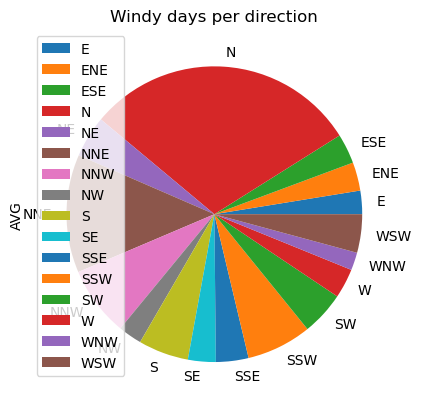

In [59]:
dfdir.plot(kind = 'pie',y='AVG',title = 'Windy days per direction')

In [ ]:
# Now lets use the windflower library for calculating the direction and the speed of wind

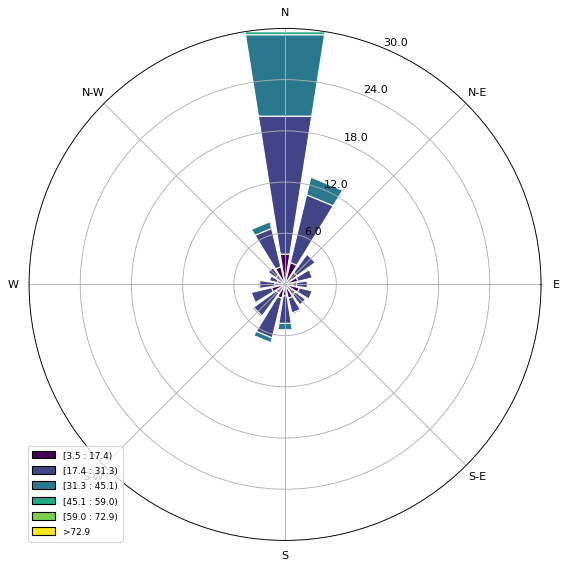

In [65]:
wt = np.array(df['winddir'])
wd = np.array(df['windspeed'])
ax = WindroseAxes.from_ax()
ax.bar(wt, wd, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [325]:
# Let's see which direction gave the maximum temperature in the decade and which the lowest

In [326]:
print(f'Minimum average temperature was: {min(df["temp"])} degrees from {df[df["temp"]==min(df["temp"])]["direction"].to_string(index = False)}')

Minimum average temperature was: -0.4 degrees from N


In [327]:
print(f'Maximum average temperature was: {max(df["temp"])} degrees from {df[df["temp"]==max(df["temp"])]["direction"].to_string(index = False)}')

Maximum average temperature was: 34.3 degrees from NNE


In [328]:
# Let's also see which is the average temperature for each direction

In [329]:
dfdirtemp = df.groupby('direction').mean()['temp'].sort_values().reset_index()
dfdirtemp

C:\Users\USER\AppData\Local\Temp\ipykernel_7776\3716801797.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfdirtemp = df.groupby('direction').mean()['temp'].sort_values().reset_index()


,direction,temp
0,NNW,12.394529
1,NW,13.840909
2,WNW,14.013253
3,WSW,15.442077
4,SW,16.491304
5,W,16.603623
6,SSW,17.615161
7,N,18.961030
8,S,19.018220
9,SSE,19.912102


In [330]:
# And we will try to use windrose library for better results

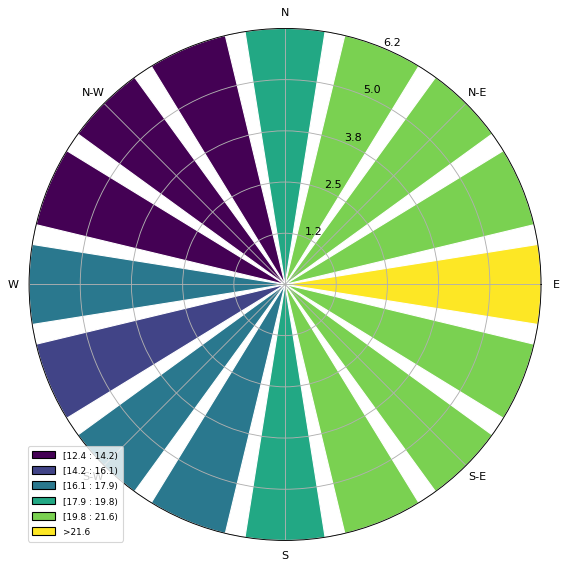

In [331]:
directions = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
dic = {directions[i]:(i*22.5) for i in range(len(directions))}
dfdirtemp['deg'] = list(map(lambda x: dic[x],dfdirtemp['direction']))
wt = np.array(dfdirtemp['temp'])
wd = np.array(dfdirtemp['deg'])
ax = WindroseAxes.from_ax()
ax.bar(wd, wt, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [332]:
# Let's make a new dataframe for all the values except for 2023

In [66]:
dfn = df[df['Year']!=2023]

In [334]:
# Now lets focus in the rainy days

In [335]:
# Let's check the total rain/snowfall for each year

C:\Users\USER\AppData\Local\Temp\ipykernel_7776\3713543303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfn.groupby('Year').sum()['precip'].plot(kind = 'bar',rot = 45,title = 'Precipitation per year')


<Axes: title={'center': 'Precipitation per year'}, xlabel='Year'>

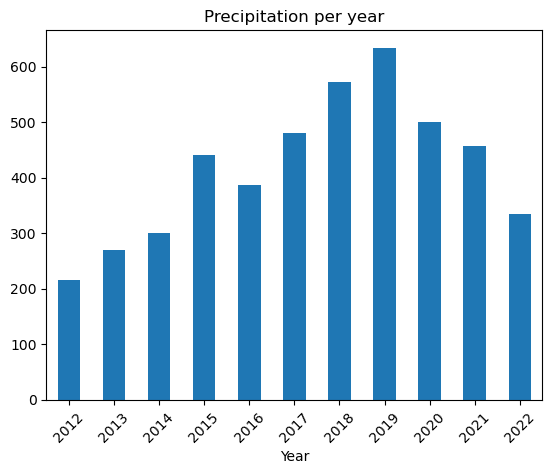

In [336]:
dfn.groupby('Year').sum()['precip'].plot(kind = 'bar',rot = 45,title = 'Precipitation per year')

In [337]:
# Also lets check which were the top5 days with the most rain

In [338]:
dfn.sort_values('precip',ascending = False)[['datetime','precip']].head()

,datetime,precip
3574,2021-10-14,60.164
418,2013-02-22,59.261
2997,2020-03-16,55.051
1536,2016-03-16,54.100
3371,2021-03-25,52.066


<Axes: >

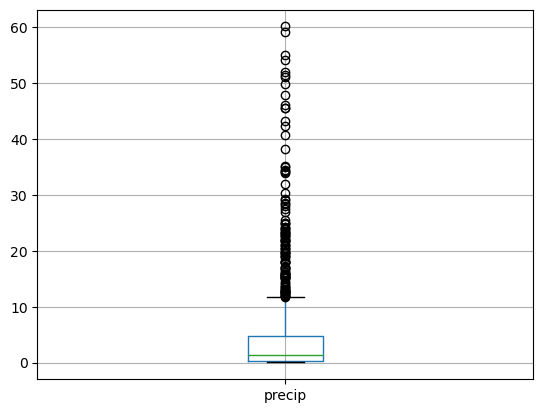

In [339]:
dfn[dfn['precip']!=0].boxplot(column = 'precip')

In [340]:
# Lets assume that the outliers are above 35mm and try to see "how many outliers" we have accross the years

In [341]:
dfn[dfn['precip']>35].count()['precip']

18

In [342]:
dfn[dfn['precip']>35].groupby('Year').count()['precip']

Year
2013    1
2014    2
2015    1
2016    2
2017    1
2018    2
2019    3
2020    2
2021    4
Name: precip, dtype: int64

<Axes: title={'center': 'High rainfall days'}, xlabel='Year'>

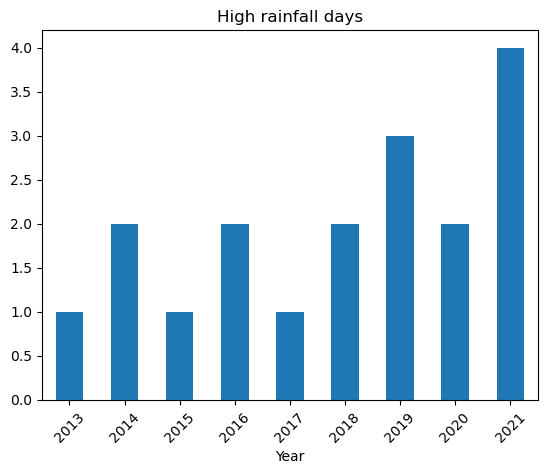

In [343]:
dfn[dfn['precip']>35].groupby('Year').count()['precip'].plot(kind = 'bar',title = 'High rainfall days',rot = 45)

In [344]:
# Now lets see about the snowy days

In [345]:
def snow (x):
    if x is np.nan:
        return 0
    elif 'snow' not in x:
        return 0
    else: 
        return 1
dfn['sn'] = list(map(snow,dfn['preciptype']))

C:\Users\USER\AppData\Local\Temp\ipykernel_7776\719761876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['sn'] = list(map(snow,dfn['preciptype']))


In [346]:
dfn.groupby('Year').sum()['sn'].reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_7776\1608678850.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfn.groupby('Year').sum()['sn'].reset_index()


,Year,sn
0,2012,1
1,2013,0
2,2014,0
3,2015,7
4,2016,1
5,2017,2
6,2018,0
7,2019,2
8,2020,0
9,2021,4


C:\Users\USER\AppData\Local\Temp\ipykernel_7776\3893517690.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfn.groupby('Year').sum()['sn'].plot(kind = 'bar',title = 'Snowy days',rot = 45)


<Axes: title={'center': 'Snowy days'}, xlabel='Year'>

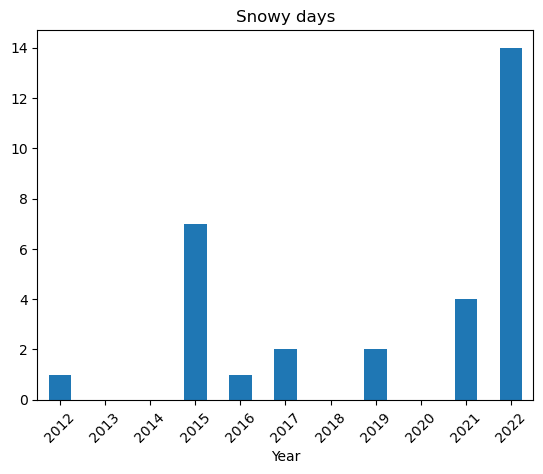

In [347]:
dfn.groupby('Year').sum()['sn'].plot(kind = 'bar',title = 'Snowy days',rot = 45)

In [348]:
dfn[dfn['sn']!=0].groupby(['Year','Month']).sum()['sn']

C:\Users\USER\AppData\Local\Temp\ipykernel_7776\1751150194.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfn[dfn['sn']!=0].groupby(['Year','Month']).sum()['sn']


Year  Month
2012  2        1
2015  1        3
      2        4
2016  1        1
2017  1        2
2019  1        2
2021  1        1
      2        3
2022  1        6
      2        1
      3        7
Name: sn, dtype: int64

In [349]:
# Now lets check the temperatures

In [213]:
dftemp = dfn.groupby('Year').mean('temp')['temp'].reset_index()

In [214]:
dftemp

,Year,temp
0,2012,18.439891
1,2013,18.354795
2,2014,18.199452
3,2015,17.856164
4,2016,18.344262
5,2017,17.928767
6,2018,18.643562
7,2019,18.127123
8,2020,18.428689
9,2021,18.491233


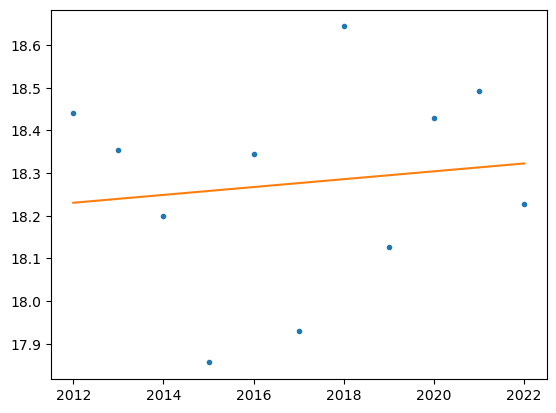

In [215]:
x1 = (dftemp['Year'].to_numpy())
y1 = (dftemp['temp'].to_numpy())
k, d = np.polyfit(x1, y1, 1)
y1_pred = k*x1 + d
plt.plot(x1, y1, '.')
plt.plot(x1, y1_pred)

In [217]:
k*(2022 -2012)

0.09214387304445633

In [ ]:
# Finally lets check the number of heatwaves during the past decade

In [ ]:
# Heatwave is a period of abnormally hot weather, where for 3 days we have maxtemp more than 36degrees and mintemp more than 26degrees

In [106]:
dheat = pd.DataFrame()
ind = 0
for i in range(len(dfn['temp'])):
    if dfn['tempmax'][i]>=36 and dfn['tempmax'][i-1]>=36 and dfn['tempmax'][i-2]>=36 and dfn['tempmin'][i]>=24 and dfn['tempmin'][i-1]>=24 and dfn['tempmin'][i-2]>=24:
        dheat = pd.concat([dheat,pd.DataFrame({"Year": [dfn['Year'][i]],
                                               "Datetime" : dfn['datetime'][i],
                                               "tempmax": [dfn['tempmax'][i]],
                                               "tempmin": [dfn['tempmin'][i]]},index = [ind])])
        ind +=1

In [107]:
dheat

,Year,Datetime,tempmax,tempmin
0,2012,2012-07-30,37.0,25.4
1,2012,2012-07-31,36.6,26.2
2,2012,2012-08-08,39.1,26.9
3,2012,2012-08-09,36.5,25.0
4,2012,2012-08-25,37.7,24.6
5,2015,2015-07-31,38.7,25.1
6,2017,2017-08-06,37.7,27.0
7,2017,2017-08-07,37.3,28.2
8,2017,2017-08-08,36.3,27.9
9,2021,2021-07-30,39.5,26.1


In [ ]:
# Finally lets see how the temp,tempmin,tempmax and precip were along the years

In [68]:
dfn.groupby('Year').agg({'temp': 'mean','tempmax': 'max','tempmin':'min', 'precip': 'sum'})

,temp,tempmax,tempmin,precip
Year,,,,
2012,18.439891,39.5,-2.1,215.419
2013,18.354795,37.1,0.1,269.692
2014,18.199452,38.8,0.5,301.068
2015,17.856164,39.0,-1.1,440.908
2016,18.344262,37.7,-1.0,385.994
2017,17.928767,42.7,-3.3,480.841
2018,18.643562,37.5,0.4,571.691
2019,18.127123,36.4,-2.7,633.878
2020,18.428689,37.1,-0.8,499.838


In [70]:
dfn.groupby('Year').agg({'temp': 'mean','tempmax': 'max','tempmin':'min', 'precip': 'sum'})

,temp,tempmax,tempmin,precip
Year,,,,
2012,18.439891,39.5,-2.1,215.419
2013,18.354795,37.1,0.1,269.692
2014,18.199452,38.8,0.5,301.068
2015,17.856164,39.0,-1.1,440.908
2016,18.344262,37.7,-1.0,385.994
2017,17.928767,42.7,-3.3,480.841
2018,18.643562,37.5,0.4,571.691
2019,18.127123,36.4,-2.7,633.878
2020,18.428689,37.1,-0.8,499.838


In [ ]:
# Finally lets have a look on how the minimum,maximum and Average temperature was for the 4 temperate seasons in 2022

In [108]:
df2022 = df[df['Year']==2022]

In [110]:
df2022

,index,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,sunrise,sunset,moonphase,conditions,description,icon,stations,Year,Month,direction
3653,0,athens,2022-01-01,17.7,5.6,11.7,17.7,5.6,11.6,5.9,...,2022-01-01T07:41:10,2022-01-01T17:16:11,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,E4115,LGAV,16741099999,16718099999...",2022,1,N
3654,1,athens,2022-01-02,17.7,8.3,12.8,17.7,8.3,12.7,6.7,...,2022-01-02T07:41:18,2022-01-02T17:17:00,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,E4115,LGAV,16741099999,16718099999...",2022,1,N
3655,2,athens,2022-01-03,17.7,5.7,11.7,17.7,4.8,11.5,7.2,...,2022-01-03T07:41:24,2022-01-03T17:17:50,0.02,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,E4115,LGAV,16741099999,16718099999...",2022,1,WSW
3656,3,athens,2022-01-04,17.6,6.3,12.0,17.6,6.3,12.0,7.3,...,2022-01-04T07:41:28,2022-01-04T17:18:41,0.05,Clear,Clear conditions throughout the day.,clear-day,"16716199999,E4115,LGAV,16741099999,16718099999...",2022,1,SW
3657,4,athens,2022-01-05,17.7,9.0,12.9,17.7,9.0,12.9,8.3,...,2022-01-05T07:41:30,2022-01-05T17:19:34,0.09,Clear,Clear conditions throughout the day.,clear-day,"16716199999,E4115,LGAV,16741099999,16718099999...",2022,1,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,360,athens,2022-12-27,18.3,6.0,11.5,18.3,6.0,11.5,7.8,...,2022-12-27T07:39:54,2022-12-27T17:12:21,0.14,Clear,Clear conditions throughout the day.,clear-day,"16716199999,E4115,LGAV,16741099999,F5422,16718...",2022,12,N
4014,361,athens,2022-12-28,17.0,7.7,11.8,17.0,7.5,11.8,8.5,...,2022-12-28T07:40:13,2022-12-28T17:13:02,0.17,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,E4115,LGAV,16741099999,16718099999...",2022,12,NNW
4015,362,athens,2022-12-29,16.7,7.0,11.8,16.7,7.0,11.8,8.1,...,2022-12-29T07:40:30,2022-12-29T17:13:44,0.21,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,E4115,LGAV,16741099999,F5422,16718...",2022,12,E
4016,363,athens,2022-12-30,17.3,6.0,11.3,17.3,6.0,11.3,8.4,...,2022-12-30T07:40:45,2022-12-30T17:14:28,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"16716199999,E4115,LGAV,16741099999,16718099999...",2022,12,WSW


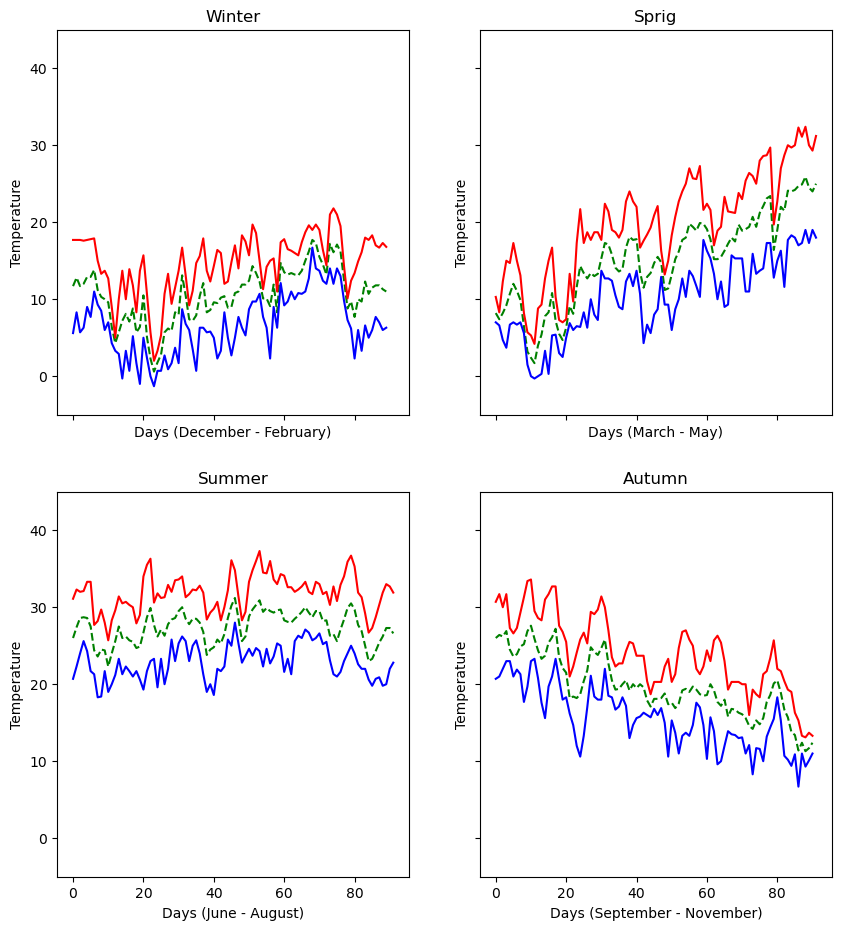

In [127]:
dfQ1 = df2022.loc[(df2022['Month']==2) | (df2022['Month']==1) | (df2022['Month']==12), ['Month','datetime','temp','tempmax','tempmin']]
Q1T = (dfQ1['temp'].to_numpy())
Q1H = (dfQ1['tempmax'].to_numpy())
Q1L = (dfQ1['tempmin'].to_numpy())

dfQ2 = df2022.loc[(df2022['Month']==3) | (df2022['Month']==4) | (df2022['Month']==5), ['Month','datetime','temp','tempmax','tempmin']]
Q2T = (dfQ2['temp'].to_numpy())
Q2H = (dfQ2['tempmax'].to_numpy())
Q2L = (dfQ2['tempmin'].to_numpy())

dfQ3 = df2022.loc[(df2022['Month']==6) | (df2022['Month']==7) | (df2022['Month']==8), ['Month','datetime','temp','tempmax','tempmin']]
Q3T = (dfQ3['temp'].to_numpy())
Q3H = (dfQ3['tempmax'].to_numpy())
Q3L = (dfQ3['tempmin'].to_numpy())

dfQ4 = df2022.loc[(df2022['Month']==9) | (df2022['Month']==10) | (df2022['Month']==11), ['Month','datetime','temp','tempmax','tempmin']]
Q4T = (dfQ4['temp'].to_numpy())
Q4H = (dfQ4['tempmax'].to_numpy())
Q4L = (dfQ4['tempmin'].to_numpy())


f, axes = plt.subplots(sharex='col', sharey=True, figsize=(10, 11),nrows=2, ncols=2)

plt.subplot(221)
plt.ylim(bottom=-5, top=45)
plt.xlabel('Days (December - February)')
plt.ylabel('Temperature')
plt.title('Winter')
plt.plot(Q1T,'g--',Q1H,'r-',Q1L,'b-')

plt.subplot(222)
plt.ylim(bottom=-5, top=45)
plt.xlabel('Days (March - May)')
plt.ylabel('Temperature')
plt.title('Sprig')
plt.plot(Q2T,'g--',Q2H,'r-',Q2L,'b-')

plt.subplot(223)
plt.ylim(bottom=-5, top=45)
plt.xlabel('Days (June - August)')
plt.ylabel('Temperature')
plt.title('Summer')
plt.plot(Q3T,'g--',Q3H,'r-',Q3L,'b-')

plt.subplot(224)
plt.ylim(bottom=-5, top=45)
plt.xlabel('Days (September - November)')
plt.ylabel('Temperature')
plt.title('Autumn')
plt.plot(Q4T,'g--',Q4H,'r-',Q4L,'b-')

plt.show()


# C PART

### The weather form October to the end of the year (and around Christmas period)

In [173]:
dfc = df.loc[(df['Month'] == 10) | (df['Month'] == 11) |(df['Month'] == 12),['datetime','temp','tempmax','tempmin','Year','Month']].reset_index()

In [176]:
dfc['day'] = dfc['datetime'].dt.day

In [177]:
dfc

,index,datetime,temp,tempmax,tempmin,Year,Month,day
0,274,2012-10-01,25.4,31.300000,19.9,2012,10,1
1,275,2012-10-02,23.0,30.100000,16.2,2012,10,2
2,276,2012-10-03,24.9,30.400000,19.5,2012,10,3
3,277,2012-10-04,23.5,27.900000,19.9,2012,10,4
4,278,2012-10-05,22.4,28.300000,16.4,2012,10,5
...,...,...,...,...,...,...,...,...
1059,4338,2023-11-17,17.5,20.503125,13.2,2023,11,17
1060,4339,2023-11-18,15.8,19.000000,11.8,2023,11,18
1061,4340,2023-11-19,11.3,15.000000,7.4,2023,11,19
1062,4341,2023-11-20,12.3,20.000000,5.8,2023,11,20


In [244]:
dfctest = dfc[(dfc['Month']!=12)&((dfctest['Month'] == 10) | ((dfctest['Month']==11) & (dfctest['day']<22)))]

In [245]:
dfctest

,index,datetime,temp,tempmax,tempmin,Year,Month,day
0,274,2012-10-01,25.4,31.300000,19.9,2012,10,1
1,275,2012-10-02,23.0,30.100000,16.2,2012,10,2
2,276,2012-10-03,24.9,30.400000,19.5,2012,10,3
3,277,2012-10-04,23.5,27.900000,19.9,2012,10,4
4,278,2012-10-05,22.4,28.300000,16.4,2012,10,5
...,...,...,...,...,...,...,...,...
1058,4337,2023-11-16,18.0,21.600000,15.0,2023,11,16
1059,4338,2023-11-17,17.5,20.503125,13.2,2023,11,17
1060,4339,2023-11-18,15.8,19.000000,11.8,2023,11,18
1061,4340,2023-11-19,11.3,15.000000,7.4,2023,11,19


In [218]:
dfcd = dfc[(dfc['Month']==12) & (dfc['day']==25)][['temp','Year']]

In [219]:
dfcd

,temp,Year
85,8.5,2012
177,11.9,2013
269,11.2,2014
361,9.8,2015
453,9.0,2016
545,9.5,2017
637,9.0,2018
729,11.8,2019
821,13.4,2020
913,11.5,2021


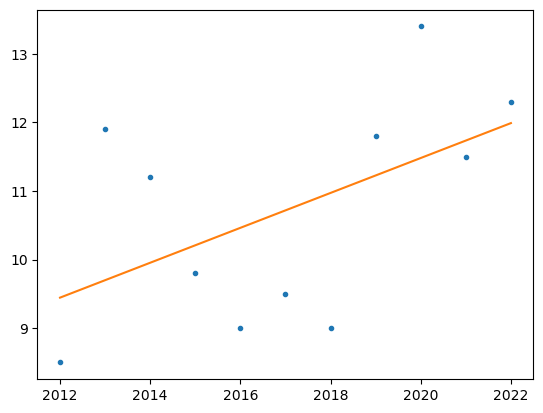

In [220]:
x1 = (dfcd['Year'].to_numpy())
y1 = (dfcd['temp'].to_numpy())
k, d = np.polyfit(x1, y1, 1)
y1_pred = k*x1 + d
plt.plot(x1, y1, '.')
plt.plot(x1, y1_pred)

In [222]:
k*(2023) + d

12.245454545454265

In [227]:
df2012 = dfc[dfc['Year']==2012]

In [230]:
df2012.drop('index',axis =1,inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_7960\2400846055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2012.drop('index',axis =1,inplace = True)


In [240]:
df2012.reset_index(inplace = True)

In [241]:
df2012

,index,datetime,temp,tempmax,tempmin,Year,Month,day
0,0,2012-10-01,25.4,31.3,19.9,2012,10,1
1,1,2012-10-02,23.0,30.1,16.2,2012,10,2
2,2,2012-10-03,24.9,30.4,19.5,2012,10,3
3,3,2012-10-04,23.5,27.9,19.9,2012,10,4
4,4,2012-10-05,22.4,28.3,16.4,2012,10,5
...,...,...,...,...,...,...,...,...
87,87,2012-12-27,11.7,18.1,5.5,2012,12,27
88,88,2012-12-28,12.0,18.0,7.8,2012,12,28
89,89,2012-12-29,10.8,13.3,7.7,2012,12,29
90,90,2012-12-30,10.2,11.3,9.5,2012,12,30


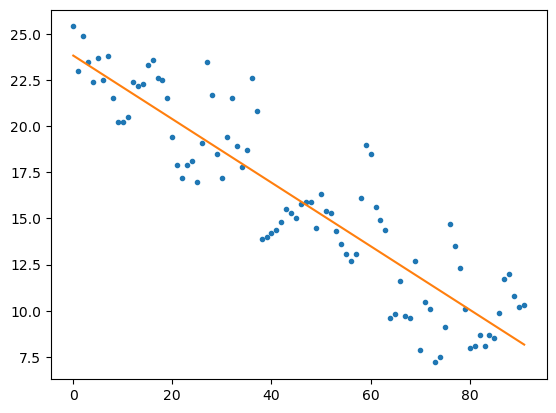

In [242]:
x1 = (df2012['index'].to_numpy())
y1 = (df2012['temp'].to_numpy())
k, d = np.polyfit(x1, y1, 1)
y1_pred = k*x1 + d
plt.plot(x1, y1, '.')
plt.plot(x1, y1_pred)

In [243]:
k*85 + d

9.200359107932732

In [ ]:
lst = [i for i in range(2012,2023)]
dfdir = pd.DataFrame()
for i in range(len(lst)):
    x = df[df['Year']==lst[i]].groupby('direction').count()['datetime']
    dfdir[f'{lst[i]}'] = x